In [190]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
import serial
from matplotlib import cm
import subprocess


In [228]:
subprocess.run("cd ../ ; pio run -t upload", shell=True)

ser = serial.Serial()
ser.baudrate = 115200
ser.port = '/dev/cu.usbserial-14130'
ser.open()

for i in range(20):            # 256 = 16*16
    b = ser.readline()          # read a byte string
    str_rn = b.decode()
    str_input = str_rn.rstrip()
    print(f"{i}  : {str_input}")
    if str_input == "Setup done":
        break

ser.close()

********************************************************************************
Obsolete PIO Core v6.1.7 is used (previous was 6.1.9)
Please remove multiple PIO Cores from a system:
https://docs.platformio.org/en/latest/core/installation/troubleshooting.html
********************************************************************************
Processing featheresp32 (platform: espressif32; board: featheresp32; framework: arduino)
--------------------------------------------------------------------------------
Verbose mode can be enabled via `-v, --verbose` option
CONFIGURATION: https://docs.platformio.org/page/boards/espressif32/featheresp32.html
PLATFORM: Espressif 32 (6.3.1) > Adafruit ESP32 Feather
HARDWARE: ESP32 240MHz, 320KB RAM, 4MB Flash
DEBUG: Current (cmsis-dap) External (cmsis-dap, esp-bridge, esp-prog, iot-bus-jtag, jlink, minimodule, olimex-arm-usb-ocd, olimex-arm-usb-ocd-h, olimex-arm-usb-tiny-h, olimex-jtag-tiny, tumpa)
PACKAGES: 
 - framework-arduinoespressif32 @ 3.20009.0 

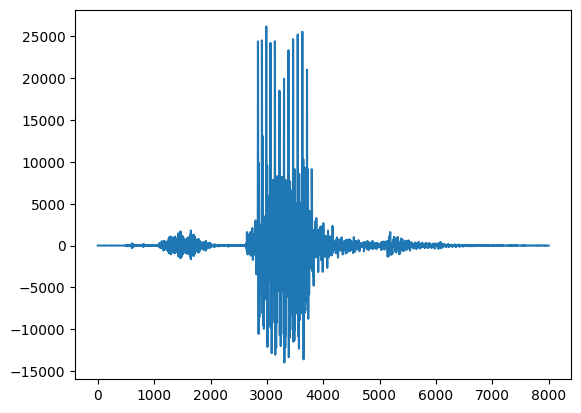

In [382]:
# Dataset path and view possible targets
# filename  = '../data_speech_commands_v0.02/four/0a2b400e_nohash_0.wav'  #Four
# filename  = '../data_speech_commands_v0.02/right/0a2b400e_nohash_3.wav' #Right
filename  = '../data_speech_commands_v0.02/stop/0a196374_nohash_0.wav'  #Stop

signal, fs = librosa.load(filename, sr=8000)
signal=signal*(2**15)
function=signal.astype(np.int16)
np.savetxt('time_series_1s.dat', function, fmt='%d', delimiter='\n')


plt.plot(signal)

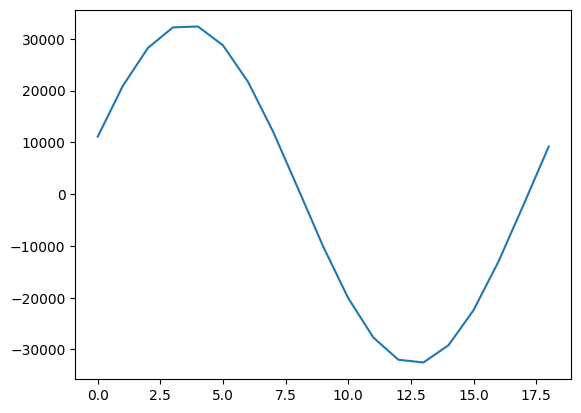

In [371]:
# gerar uma forma de onda que é um seno a 440Hz, de um segundo, amostrado a 8KHz

time=np.linspace(0,1,8000)
function=2**15*np.sin(2*np.pi*440*time)
function=function.astype(np.int16)
np.savetxt('time_series_1s.dat', function, fmt='%d', delimiter='\n')


plt.plot(np.array(function[1:20]))

In [230]:
a= function
a= a.astype(np.int16)
# a= a.astype(np.int32)


ser = serial.Serial()
ser.baudrate = 115200
ser.port = '/dev/cu.usbserial-14130'
ser.open()

for i in range(len(a)):
    values = str(a[i])
    send=bytearray(values, encoding='utf8')
    jumpline=bytearray('\n', encoding='utf8')
    ser.write(send)
    ser.write(jumpline)
    # print(f"send   [{i}]  : {send}")
    
data = []                       # empty list to store the data
for i in range(256):            # 256 = 16*16
    b = ser.readline()          # read a byte string
    str_rn = b.decode()
    str_input = str_rn.rstrip()
    data.append(str_input)
    print(f"{i}  : {str_input}")
    
    
mfcc=np.array(data)
# mfcc=mfcc.astype(np.int16)
mfcc=mfcc.astype(np.float16)

    


ser.close()
print(len(mfcc))

0  : 1.80
1  : -0.01
2  : 0.82
3  : -0.73
4  : -0.86
5  : 0.23
6  : 0.66
7  : -0.35
8  : 0.66
9  : 0.74
10  : -0.12
11  : -0.13
12  : 0.41
13  : -0.00
14  : -0.41
15  : 0.13
16  : 0.12
17  : -0.74
18  : -0.66
19  : 0.35
20  : 46.45
21  : 2.09
22  : 0.32
23  : 0.48
24  : -0.51
25  : -0.87
26  : 0.17
27  : 0.36
28  : -0.22
29  : 0.18
30  : 0.26
31  : -0.05
32  : 0.28
33  : 0.30
34  : -0.00
35  : -0.30
36  : -0.28
37  : 0.05
38  : -0.26
39  : -0.18
40  : 0.22
41  : 44.01
42  : 1.48
43  : 1.31
44  : 0.63
45  : -0.47
46  : 0.63
47  : 0.58
48  : 0.64
49  : 0.10
50  : 0.32
51  : -0.03
52  : 0.15
53  : 0.35
54  : 0.39
55  : -0.00
56  : -0.39
57  : -0.35
58  : -0.15
59  : 0.03
60  : -0.32
61  : -0.10
62  : 49.77
63  : 3.73
64  : 1.50
65  : 2.11
66  : 0.44
67  : -0.65
68  : 0.62
69  : 0.27
70  : -0.54
71  : 0.46
72  : 0.36
73  : -0.05
74  : 0.20
75  : 0.07
76  : -0.00
77  : -0.07
78  : -0.20
79  : 0.05
80  : -0.36
81  : -0.46
82  : 0.54
83  : 122.68
84  : 0.19
85  : 2.03
86  : -1.24
87  : -1.62


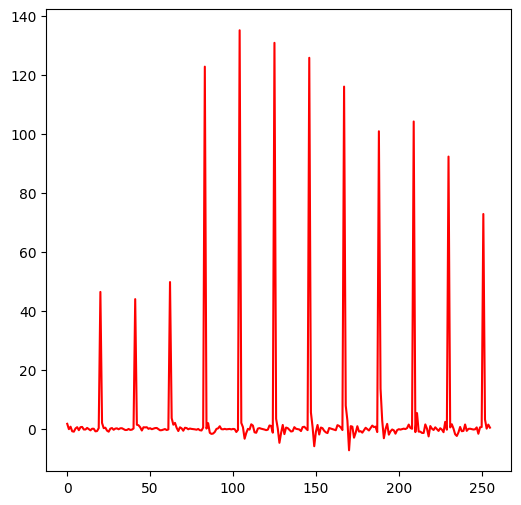

In [231]:
%matplotlib inline


plt.figure(figsize=(6,6))
plt.plot(mfcc,'r')
plt.show()


(16, 16)


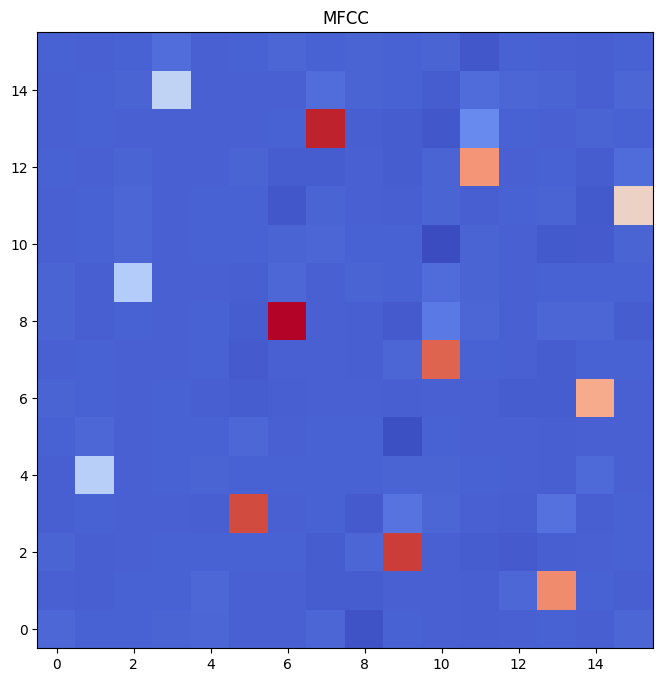

In [232]:
mfcc_from_time_series = mfcc.reshape(16,16)

print(mfcc_from_time_series.shape)

#plt.figure(figsize=(12,12))

fig, ax = plt.subplots(figsize=(8,8))
mfcc_from_time_series= np.swapaxes(mfcc_from_time_series, 0 ,1)
cax = ax.imshow(mfcc_from_time_series, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()

In [470]:
#Change -DFFTXXXX to the desired FFT size
# subprocess.run('g++ -Dcomputer -DFFT512 compute_mfcc.cpp -o compute_mfcc' , shell=True) 
subprocess.run('g++ -Dcomputer -DFFT1024 compute_mfcc.cpp -o compute_mfcc' , shell=True) 
# subprocess.run('g++ -Dcomputer -DFFT2048 compute_mfcc.cpp -o compute_mfcc' , shell=True) 
subprocess.run(["./compute_mfcc"], shell=True)

winlengthsamples = 904
frameshiftsamples = 400
prevsamples.size() = 504
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size()

CompletedProcess(args=['./compute_mfcc'], returncode=0)

 = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904
before : frame.size() = 504
after : frame.size() = 904


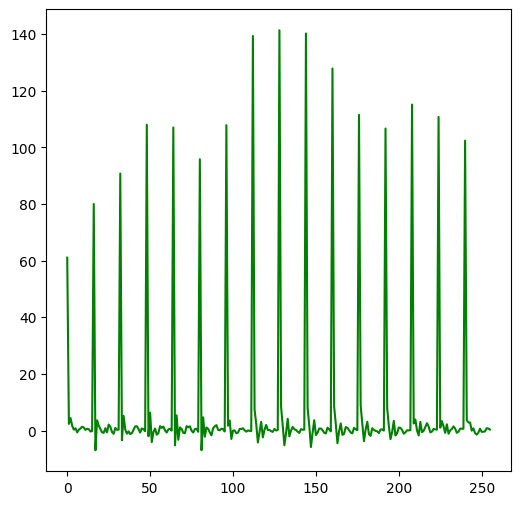

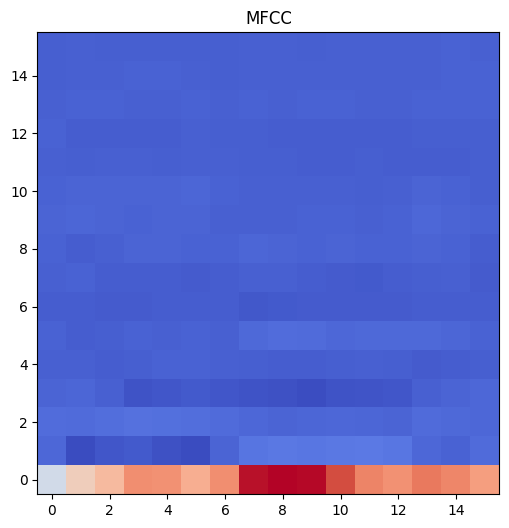

In [469]:

mfcc_from_time_series = np.genfromtxt('mfcc_from_time_series_1s.dat',delimiter='\n',dtype=None)

%matplotlib inline


plt.figure(figsize=(6,6))
# #plt.plot(mfcc_output,'r')

plt.plot(mfcc_from_time_series,'g')
# plt.plot(mfcc,'r')

mfcc_from_time_series = mfcc_from_time_series.reshape(16,16)
fig, ax = plt.subplots(figsize=(6,6))
mfcc_from_time_series= np.swapaxes(mfcc_from_time_series, 0 ,1)
cax = ax.imshow(mfcc_from_time_series, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()